In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from functools import partial

In [10]:
from dotenv import load_dotenv

from pathlib import Path

env_path = Path("../../.env-live")

if env_path.exists():
    print('envs Loaded')
    load_dotenv(dotenv_path=env_path)
from jrjModelRegistry.jrjModelRegistry import registerAJrjModel

envs Loaded
Pinged your deployment. You successfully connected to MongoDB!


In [11]:
def generalRegressionPredictor(self, transformedData):
    return self.predict(transformedData)

In [14]:
mortgageDf = pd.read_excel("./Mortgage.xlsx")
# mortgageDf = pd.read_excel("https://www.dropbox.com/scl/fi/32vgpt3jvtztu86avdnwg/Mortgage.xlsx?rlkey=qx1d46hzgn4h67zrcyajdyl3e&dl=1")
mortgageDf

,y,x1,x2
0,1,16.35,49.94
1,1,34.43,56.16
2,1,39.19,36.89
3,1,23.58,56.88
4,0,29.92,27.05
5,1,25.26,44.38
6,1,36.51,48.98
7,1,11.70,55.55
8,0,32.21,31.28
9,1,28.74,35.63


In [16]:
mortgageSampleData = {
    "x1": [16.35, 20, 20, 40],
    "x2": [49.94, 30, 15, 50]
}
mortgageSampleData

{'x1': [16.35, 20, 20, 40], 'x2': [49.94, 30, 15, 50]}

In [18]:
mortgageDf.size

90

In [20]:
mortgageDf.describe()

,y,x1,x2
count,30.000000,30.000000,30.000000
mean,0.566667,24.305667,37.819333
std,0.504007,9.842847,10.942216
min,0.000000,10.120000,20.790000
25%,0.000000,14.857500,29.372500
50%,1.000000,25.570000,36.260000
75%,1.000000,32.182500,47.777500
max,1.000000,39.190000,56.880000


In [22]:
mortgageDf.shape

(30, 3)

In [24]:
import matplotlib.pyplot as plt

In [26]:
# Plotting
fig1 = plt.figure(
  figsize=(8, 8)
)

<Figure size 800x800 with 0 Axes>

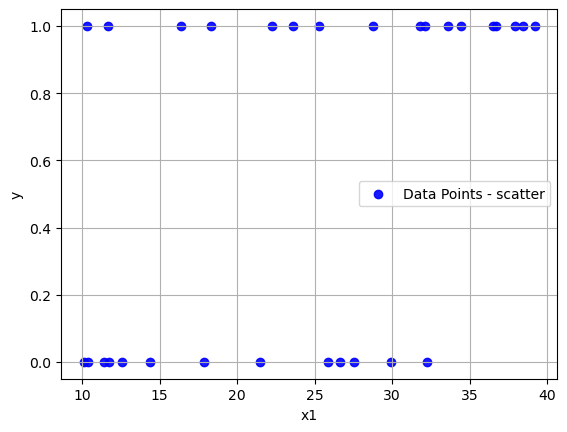

In [28]:
plt.scatter(
  mortgageDf["x1"],
  mortgageDf["y"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True)



plt.show()

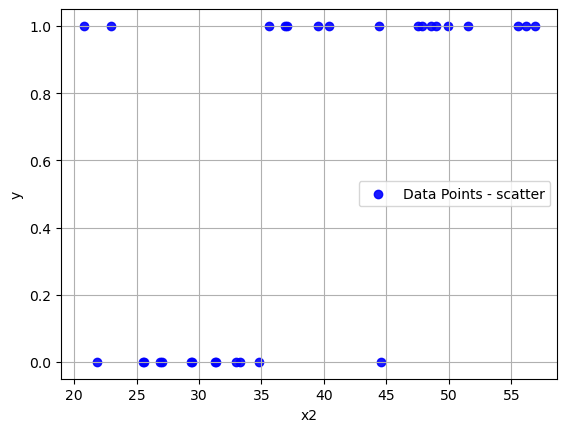

In [30]:
plt.scatter(
  mortgageDf["x2"],
  mortgageDf["y"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.grid(True)



plt.show()

In [32]:
def mortgageRegModel1Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    dfTransformer = sm.add_constant(df[["x1", "x2"]],has_constant='add')
    return dfTransformer

In [34]:
mortgageRegModel1 = sm.OLS(
  mortgageDf["y"],
  mortgageRegModel1Transformer(mortgageDf)
).fit() 
print(mortgageRegModel1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     13.82
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           7.37e-05
Time:                        02:50:31   Log-Likelihood:                -10.931
No. Observations:                  30   AIC:                             27.86
Df Residuals:                      27   BIC:                             32.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8682      0.281     -3.089      0.0

In [36]:
predict1 = mortgageRegModel1.predict(mortgageRegModel1Transformer(mortgageDf))
mortgageDf['predict1'] = predict1
mortgageDf

,y,x1,x2,predict1
0,1,16.35,49.94,0.729871
1,1,34.43,56.16,1.231162
2,1,39.19,36.89,0.823078
3,1,23.58,56.88,1.045349
4,0,29.92,27.05,0.394258
5,1,25.26,44.38,0.754114
6,1,36.51,48.98,1.084883
7,1,11.70,55.55,0.787177
8,0,32.21,31.28,0.546666
9,1,28.74,35.63,0.593656


In [38]:
mortgageRegModel1.predict(mortgageRegModel1Transformer(mortgageSampleData))

0    0.729871
1    0.283569
2   -0.103894
3    1.176981
dtype: float64

In [40]:
mortgageRegModel1.transformer = mortgageRegModel1Transformer
mortgageRegModel1.mainPredictor = partial(generalRegressionPredictor, mortgageRegModel1)
registerAJrjModel(
    mortgageRegModel1,
    {
        "modelName":f"raoyi_li_mortgageRegModel1",
        "version":"1.0.1",
        "params": mortgageRegModel1.params.to_dict(),
        "score": float(mortgageRegModel1.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": mortgageRegModel1.pvalues.to_dict(),
            "r_squared": float(mortgageRegModel1.rsquared),
            "adj_r_squared": float(mortgageRegModel1.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": mortgageSampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g2/raoyi_li_mortgageRegModel1__1.0.1.pkl.zip


{'_id': '685c99603f86310a2e7ac6ff',
 'modelName': 'raoyi_li_mortgageRegModel1',
 'version': '1.0.1',
 'params': {'const': -0.8681513493329867,
  'x1': 0.018839738783042844,
  'x2': 0.02583085207879415},
 'score': 0.5058321663511869,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 0.004615118049710337,
   'x1': 0.011976541959909286,
   'x2': 0.00033330778096416354},
  'r_squared': 0.5058321663511869,
  'adj_r_squared': 0.46922714163645995},
 'sampleData': {'dataForTransfer': {'x1': [16.35, 20, 20, 40],
   'x2': [49.94, 30, 15, 50]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 8490,
 'zippedModelSizeBytes': 4282,
 's3Url': '273-g2/raoyi_li_mortgageRegModel1__1.0.1.pkl.zip',
 'createdAt': '2025-06-26T00:50:40.043Z',
 'updatedAt': '2025-06-26T00:50:40.043Z'}

In [42]:
mortgageLogRegModel2 = sm.Logit(
  mortgageDf["y"],
  mortgageRegModel1Transformer(mortgageDf)
).fit()
print(mortgageLogRegModel2.summary())

Optimization terminated successfully.
         Current function value: 0.363910
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   30
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            2
Date:                Thu, 26 Jun 2025   Pseudo R-squ.:                  0.4681
Time:                        02:50:40   Log-Likelihood:                -10.917
converged:                       True   LL-Null:                       -20.527
Covariance Type:            nonrobust   LLR p-value:                 6.708e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3671      3.196     -2.931      0.003     -15.631      -3.103
x1             0.1349      0.

In [44]:
predict2 = mortgageLogRegModel2.predict(mortgageRegModel1Transformer(mortgageDf))
mortgageDf['predict2'] = predict2
mortgageDf

,y,x1,x2,predict1,predict2
0,1,16.35,49.94,0.729871,0.850564
1,1,34.43,56.16,1.231162,0.994966
2,1,39.19,36.89,0.823078,0.923739
3,1,23.58,56.88,1.045349,0.981132
4,0,29.92,27.05,0.394258,0.375201
5,1,25.26,44.38,0.754114,0.875451
6,1,36.51,48.98,1.084883,0.986447
7,1,11.70,55.55,0.787177,0.892025
8,0,32.21,31.28,0.546666,0.634794
9,1,28.74,35.63,0.593656,0.702665


In [ ]:
mortgageLogRegModel2.predict(mortgageRegModel1Transformer(mortgageSampleData))

In [46]:
mortgageLogRegModel2.transformer = mortgageRegModel1Transformer
mortgageLogRegModel2.mainPredictor = partial(generalRegressionPredictor, mortgageLogRegModel2)
registerAJrjModel(
    mortgageLogRegModel2,
    {
        "modelName": "raoyi_li_mortgageLogRegModel2",
        "version": "1.0.1",
        "params": mortgageLogRegModel2.params.to_dict(),
        "score": float(mortgageLogRegModel2.prsquared),  # Pseudo R-squared
        "modelLibrary": "statsmodels.api.Logit",
        "libraryMetadata": {
            "pvalues": mortgageLogRegModel2.pvalues.to_dict(),
            "pseudo_r_squared": float(mortgageLogRegModel2.prsquared),
            "llf": float(mortgageLogRegModel2.llf),
            "aic": float(mortgageLogRegModel2.aic),
            "bic": float(mortgageLogRegModel2.bic)
        },
        "sampleData": {
            "dataForTransfer": mortgageSampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g2/raoyi_li_mortgageLogRegModel2__1.0.1.pkl.zip


{'_id': '685c996a3f86310a2e7ac700',
 'modelName': 'raoyi_li_mortgageLogRegModel2',
 'version': '1.0.1',
 'params': {'const': -9.367088078492149,
  'x1': 0.13489787821383845,
  'x2': 0.17822460583226582},
 'score': 0.4681481133632537,
 'modelLibrary': 'statsmodels.api.Logit',
 'libraryMetadata': {'pvalues': {'const': 0.003379984512058825,
   'x1': 0.035085843670243935,
   'x2': 0.005821445057279705},
  'pseudo_r_squared': 0.4681481133632537,
  'llf': -10.917298655823469,
  'aic': 27.834597311646938,
  'bic': 32.038189456633404},
 'sampleData': {'dataForTransfer': {'x1': [16.35, 20, 20, 40],
   'x2': [49.94, 30, 15, 50]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 6814,
 'zippedModelSizeBytes': 3338,
 's3Url': '273-g2/raoyi_li_mortgageLogRegModel2__1.0.1.pkl.zip',
 'createdAt': '2025-06-26T00:50:50.768Z',
 'updatedAt': '2025-06-26T00:50:50.768Z'}

# For Visulization

In [49]:
model3 = sm.OLS(
  mortgageDf["y"],
  sm.add_constant(mortgageDf[["x1"]])
)
model3Fit = model3.fit()
print(model3Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     6.875
Date:                Thu, 26 Jun 2025   Prob (F-statistic):             0.0140
Time:                        02:50:51   Log-Likelihood:                -18.211
No. Observations:                  30   AIC:                             40.42
Df Residuals:                      28   BIC:                             43.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0141      0.227      0.062      0.9

In [51]:
model4 = sm.Logit(
  mortgageDf["y"],
  sm.add_constant(mortgageDf[["x1"]])
)
model4Fit = model4.fit()
print(model4Fit.summary())

Optimization terminated successfully.
         Current function value: 0.579907
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Jun 2025   Pseudo R-squ.:                  0.1525
Time:                        02:50:53   Log-Likelihood:                -17.397
converged:                       True   LL-Null:                       -20.527
Covariance Type:            nonrobust   LLR p-value:                   0.01235
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2077      1.140     -1.936      0.053      -4.442       0.027
x1             0.1043      0.

In [53]:
min = 0
max = mortgageDf["x1"].max() + 10
x = np.linspace(min - 5, max + 5, 500)
import math
lREq = 0.0141 + x *  0.0227
logREq = pow(math.e, (-2.2077  + 0.1043 * x))/ (1+ pow(math.e, (-2.2077  + 0.1043 * x)))


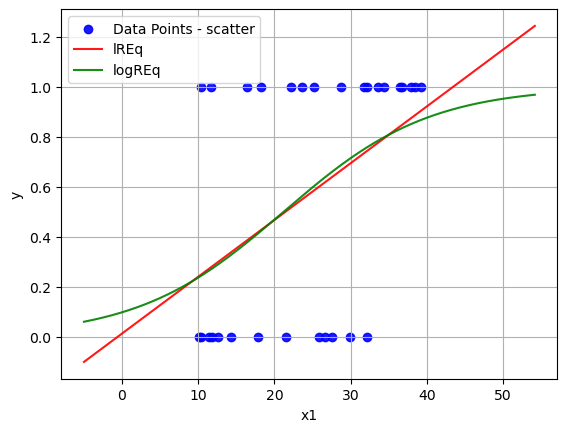

In [55]:

plt.scatter(
  mortgageDf["x1"],
  mortgageDf["y"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  x,
  lREq,
  color='red',
  alpha=0.9,
  label='lREq',
)

plt.plot(
  x,
  logREq,
  color='green',
  alpha=0.9,
  label='logREq',
)

plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True)



plt.show()

In [57]:
mortgageDf['yHat2'] = mortgageDf['predict2'].apply(lambda x: 1 if x > 0.5 else 0)
mortgageDf

,y,x1,x2,predict1,predict2,yHat2
0,1,16.35,49.94,0.729871,0.850564,1
1,1,34.43,56.16,1.231162,0.994966,1
2,1,39.19,36.89,0.823078,0.923739,1
3,1,23.58,56.88,1.045349,0.981132,1
4,0,29.92,27.05,0.394258,0.375201,0
5,1,25.26,44.38,0.754114,0.875451,1
6,1,36.51,48.98,1.084883,0.986447,1
7,1,11.70,55.55,0.787177,0.892025,1
8,0,32.21,31.28,0.546666,0.634794,1
9,1,28.74,35.63,0.593656,0.702665,1


# Hold-out

In [60]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
# trainSet, testSet = train_test_split(wagesDf, test_size=0.15, random_state=55)
trainSet, testSet = train_test_split(mortgageDf, test_size=0.15)

trainSet.head()

,y,x1,x2,predict1,predict2,yHat2
21,1,22.22,20.79,0.087491,0.065109,0
7,1,11.70,55.55,0.787177,0.892025,1
23,0,11.75,32.96,0.204600,0.129233,0
5,1,25.26,44.38,0.754114,0.875451,1
10,1,18.28,39.50,0.496558,0.534624,1


In [62]:
mortgageDf.shape, trainSet.shape, testSet.shape

((30, 6), (25, 6), (5, 6))

In [64]:
modelHoldOut = sm.Logit(
  trainSet["y"],
  mortgageRegModel1Transformer(trainSet)
)
modelHoldOutFit = modelHoldOut.fit()
print(modelHoldOutFit.summary())

Optimization terminated successfully.
         Current function value: 0.407283
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   25
Model:                          Logit   Df Residuals:                       22
Method:                           MLE   Df Model:                            2
Date:                Thu, 26 Jun 2025   Pseudo R-squ.:                  0.4062
Time:                        02:51:01   Log-Likelihood:                -10.182
converged:                       True   LL-Null:                       -17.148
Covariance Type:            nonrobust   LLR p-value:                 0.0009433
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1968      3.142     -2.609      0.009     -14.354      -2.039
x1             0.1237      0.

In [66]:
predictHoldOut = modelHoldOutFit.predict(mortgageRegModel1Transformer(testSet))
testSet['predictHoldOut'] = predictHoldOut
testSet

,y,x1,x2,predict1,predict2,yHat2,predictHoldOut
28,1,36.71,37.05,0.780489,0.899188,1,0.881181
11,0,10.12,31.39,0.133337,0.082606,0,0.104341
0,1,16.35,49.94,0.729871,0.850564,1,0.810672
27,0,27.53,25.63,0.312551,0.252476,0,0.293938
22,1,32.10,51.56,1.068443,0.984517,1,0.974667


In [68]:
testSet['yHatHoldOut'] = testSet['predictHoldOut'].apply(lambda x: 1 if x > 0.5 else 0)
testSet['isHoldOutCorrect'] = testSet.apply(lambda row: 1 if row['y'] == row['yHatHoldOut'] else 0, axis=1)
testSet

,y,x1,x2,predict1,predict2,yHat2,predictHoldOut,yHatHoldOut,isHoldOutCorrect
28,1,36.71,37.05,0.780489,0.899188,1,0.881181,1,1
11,0,10.12,31.39,0.133337,0.082606,0,0.104341,0,1
0,1,16.35,49.94,0.729871,0.850564,1,0.810672,1,1
27,0,27.53,25.63,0.312551,0.252476,0,0.293938,0,1
22,1,32.10,51.56,1.068443,0.984517,1,0.974667,1,1


In [70]:
accuracy = (np.sum(testSet['isHoldOutCorrect']) / len(testSet['yHatHoldOut'])) * 100
accuracy

100.0

# K-Fold Cross validation

In [73]:
from sklearn.model_selection import KFold

In [75]:
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=55)


In [77]:
check = kf.split(mortgageDf)
check
experiment = 1
# Loop through each fold
# Initialize variables to store results
accuracies = []
bestModel = None
bestAccuracy = 0

for train_index, val_index in check:
    # Split the data
    trainSet, valSet = mortgageDf.iloc[train_index], mortgageDf.iloc[val_index]

    # Fit the model

    trainModel = sm.Logit(
      trainSet["y"],
      mortgageRegModel1Transformer(trainSet)
    )
    trainModelFit = trainModel.fit()

    # Predict on the validation set
    val_predictions = trainModelFit.predict(mortgageRegModel1Transformer(valSet))
    valSet['val_predictions'] = val_predictions
    valSet['yHatCross'] = valSet['val_predictions'].apply(lambda x: 1 if x > 0.5 else 0)
    valSet['isCrossCorrect'] = valSet.apply(lambda row: 1 if row['y'] == row['yHatCross'] else 0, axis=1)
    accuracy = (np.sum(valSet['isCrossCorrect']) / len(valSet['yHatCross'])) * 100
    accuracies.append(accuracy)

    if accuracy > bestAccuracy: 
        bestAccuracy = accuracy
        bestModel = trainModelFit
    


    # Print summary for each fold (optional)
    print(f'expr={experiment}')
    experiment = experiment +1
    print(trainModelFit.summary())

Optimization terminated successfully.
         Current function value: 0.385918
         Iterations 7
expr=1
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   24
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            2
Date:                Thu, 26 Jun 2025   Pseudo R-squ.:                  0.4318
Time:                        02:51:06   Log-Likelihood:                -9.2620
converged:                       True   LL-Null:                       -16.301
Covariance Type:            nonrobust   LLR p-value:                 0.0008773
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3046      3.201     -2.595      0.009     -14.578      -2.031
x1             0.1361 

/var/folders/0n/hktc0qv56wzg6w5xgfn3ytsh0000gn/T/ipykernel_1502/3445150256.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valSet['val_predictions'] = val_predictions
/var/folders/0n/hktc0qv56wzg6w5xgfn3ytsh0000gn/T/ipykernel_1502/3445150256.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valSet['yHatCross'] = valSet['val_predictions'].apply(lambda x: 1 if x > 0.5 else 0)
/var/folders/0n/hktc0qv56wzg6w5xgfn3ytsh0000gn/T/ipykernel_1502/3445150256.py:26: SettingWithCopyWarning: 
A value is trying to

expr=4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   24
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            2
Date:                Thu, 26 Jun 2025   Pseudo R-squ.:                  0.3707
Time:                        02:51:06   Log-Likelihood:                -10.416
converged:                       True   LL-Null:                       -16.552
Covariance Type:            nonrobust   LLR p-value:                  0.002163
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1881      3.232     -2.533      0.011     -14.523      -1.853
x1             0.1129      0.064      1.752      0.080      -0.013       0.239
x2             0.1604      0.065      2.453  

/var/folders/0n/hktc0qv56wzg6w5xgfn3ytsh0000gn/T/ipykernel_1502/3445150256.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valSet['val_predictions'] = val_predictions
/var/folders/0n/hktc0qv56wzg6w5xgfn3ytsh0000gn/T/ipykernel_1502/3445150256.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valSet['yHatCross'] = valSet['val_predictions'].apply(lambda x: 1 if x > 0.5 else 0)
/var/folders/0n/hktc0qv56wzg6w5xgfn3ytsh0000gn/T/ipykernel_1502/3445150256.py:26: SettingWithCopyWarning: 
A value is trying to

In [79]:
accuracies

[100.0, 83.33333333333334, 66.66666666666666, 100.0, 83.33333333333334]

In [81]:
print(f"Average accuracies across all folds: {sum(accuracies) /len(accuracies)}")

Average accuracies across all folds: 86.66666666666667


In [83]:
bestModel.transformer = mortgageRegModel1Transformer
bestModel.mainPredictor = partial(generalRegressionPredictor, bestModel)
registerAJrjModel(
    bestModel,
    {
        "modelName": "raoyi_li_to_predictLogRegModelBestCrossValidation",
        "version": "1.0.1",
        "params": bestModel.params.to_dict(),
        "score": bestAccuracy,  # Pseudo R-squared
        "modelLibrary": "statsmodels.api.Logit",
        "libraryMetadata": {
            "pvalues": bestModel.pvalues.to_dict(),
            "pseudo_r_squared": float(bestModel.prsquared),
            "llf": float(bestModel.llf),
            "aic": float(bestModel.aic),
            "bic": float(bestModel.bic)
        },
        "sampleData": {
            "dataForTransfer": mortgageSampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g2/raoyi_li_to_predictLogRegModelBestCrossValidation__1.0.1.pkl.zip


{'_id': '685c99883f86310a2e7ac701',
 'modelName': 'raoyi_li_to_predictLogRegModelBestCrossValidation',
 'version': '1.0.1',
 'params': {'const': -8.304591382313733,
  'x1': 0.13607220463810457,
  'x2': 0.14914512178915829},
 'score': 100.0,
 'modelLibrary': 'statsmodels.api.Logit',
 'libraryMetadata': {'pvalues': {'const': 0.009467972760647734,
   'x1': 0.044040673806558635,
   'x2': 0.016552134859341833},
  'pseudo_r_squared': 0.43179972667045385,
  'llf': -9.262027186396745,
  'aic': 24.52405437279349,
  'bic': 28.058215863837326},
 'sampleData': {'dataForTransfer': {'x1': [16.35, 20, 20, 40],
   'x2': [49.94, 30, 15, 50]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 6751,
 'zippedModelSizeBytes': 3278,
 's3Url': '273-g2/raoyi_li_to_predictLogRegModelBestCrossValidation__1.0.1.pkl.zip',
 'createdAt': '2025-06-26T00:51:20.596Z',
 'updatedAt': '2025-06-26T00:51:20.596Z'}